# Proyek Analisis Data: **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Hafiyan Al Muqaffi Umary
- **Email:** jhodywiraputra@student.ub.ac.id
- **ID Dicoding:** MC006D5Y1369

## Menentukan Pertanyaan Bisnis

1. **Bagaimana pola peminjaman sepeda berdasarkan waktu dalam sehari, dan apakah ada perbedaan pola antara hari kerja dan akhir pekan?**
2. **Bagaimana tren penggunaan sepeda berdasarkan musim dan kondisi cuaca?**

## Import Semua Packages/Library yang Digunakan

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [34]:
# Dataset ini adalah hasil penggabungan dan pembersihan antara 2 dataset (day.csv dan hours.csv)
df = pd.read_csv("all_data.csv")

# Menampilkan informasi awal
print("Informasi Dataset:")
print(df.info())

# Menampilkan 5 baris pertama
display(df.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dteday         17379 non-null  object 
 1   instant        17379 non-null  int64  
 2   season         17379 non-null  int64  
 3   yr             17379 non-null  int64  
 4   mnth           17379 non-null  int64  
 5   hr             17379 non-null  int64  
 6   holiday        17379 non-null  int64  
 7   weekday        17379 non-null  int64  
 8   workingday     17379 non-null  int64  
 9   weathersit     17379 non-null  int64  
 10  temp           17379 non-null  float64
 11  atemp          17379 non-null  float64
 12  hum            17379 non-null  float64
 13  windspeed      17379 non-null  float64
 14  casual         17379 non-null  int64  
 15  registered     17379 non-null  int64  
 16  cnt            17379 non-null  int64  
 17  cnt_category   17379 non-null  

,dteday,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,cnt_category,temp_category,cnt_binned,temp_binned
0,2011-01-01,1,1,0,1,0,0,6,0,1,...,14.395,81.0,0.0,3,13,16,Low,Cold,Low,Cold
1,2011-01-01,2,1,0,1,1,0,6,0,1,...,13.635,80.0,0.0,8,32,40,Low,Cold,Low,Cold
2,2011-01-01,3,1,0,1,2,0,6,0,1,...,13.635,80.0,0.0,5,27,32,Low,Cold,Low,Cold
3,2011-01-01,4,1,0,1,3,0,6,0,1,...,14.395,75.0,0.0,3,10,13,Low,Cold,Low,Cold
4,2011-01-01,5,1,0,1,4,0,6,0,1,...,14.395,75.0,0.0,0,1,1,Low,Cold,Low,Cold


**Insight:**
- Dataset sekarang berisi informasi lengkap per jam dengan tambahan informasi agregat harian dari day.csv.
- Kolom yang sebelumnya ada di kedua dataset tetap dipertahankan dengan penamaan yang berbeda (_hour dan _day untuk menghindari kebingungan).
- Dengan dataset ini, kita bisa menganalisis tren peminjaman sepeda baik secara harian maupun per jam dalam satu file.

### Assessing Data

In [35]:
print("Informasi Dataset:")
print(df.info())

print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

print("\nStatistik Deskriptif Dataset:")
print(df.describe())

print("\nJumlah Data Duplikat:", df.duplicated().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dteday         17379 non-null  object 
 1   instant        17379 non-null  int64  
 2   season         17379 non-null  int64  
 3   yr             17379 non-null  int64  
 4   mnth           17379 non-null  int64  
 5   hr             17379 non-null  int64  
 6   holiday        17379 non-null  int64  
 7   weekday        17379 non-null  int64  
 8   workingday     17379 non-null  int64  
 9   weathersit     17379 non-null  int64  
 10  temp           17379 non-null  float64
 11  atemp          17379 non-null  float64
 12  hum            17379 non-null  float64
 13  windspeed      17379 non-null  float64
 14  casual         17379 non-null  int64  
 15  registered     17379 non-null  int64  
 16  cnt            17379 non-null  int64  
 17  cnt_category   17379 non-null  

**Insight:**
- Informasi umum dataset  
- Statistik deskriptif dari dataset
- Jumlah nilai yang hilang di setiap kolom
- Apa data duplikat?

### Cleaning Data

In [36]:
# Load dataset
df = pd.read_csv("all_data.csv")

# Konversi kolom dteday menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')

# Cek apakah ada nilai NaT setelah konversi (menandakan tanggal tidak valid)
invalid_dates = df[df['dteday'].isna()]

# Jika ada tanggal yang tidak valid, hapus baris tersebut
if not invalid_dates.empty:
    df = df.dropna(subset=['dteday'])
    print(f"{len(invalid_dates)} baris dengan tanggal tidak valid telah dihapus.")

# Simpan dataset yang sudah dibersihkan
df.to_csv("all_data_cleaned.csv", index=False)

print("Pembersihan selesai! Dataset telah disimpan sebagai 'all_data_cleaned.csv'.")

Pembersihan selesai! Dataset telah disimpan sebagai 'all_data_cleaned.csv'.


**Insight:**
- Mengonversi kolom dteday dari tipe object menjadi datetime.
- Memeriksa apakah ada tanggal yang tidak valid.
- Menghapus entri yang bermasalah jika ditemukan.

## Exploratory Data Analysis (EDA)

### Explore ...

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283     20.376474   
std        0.167165      2.005771      0.465431      0.639357      7.

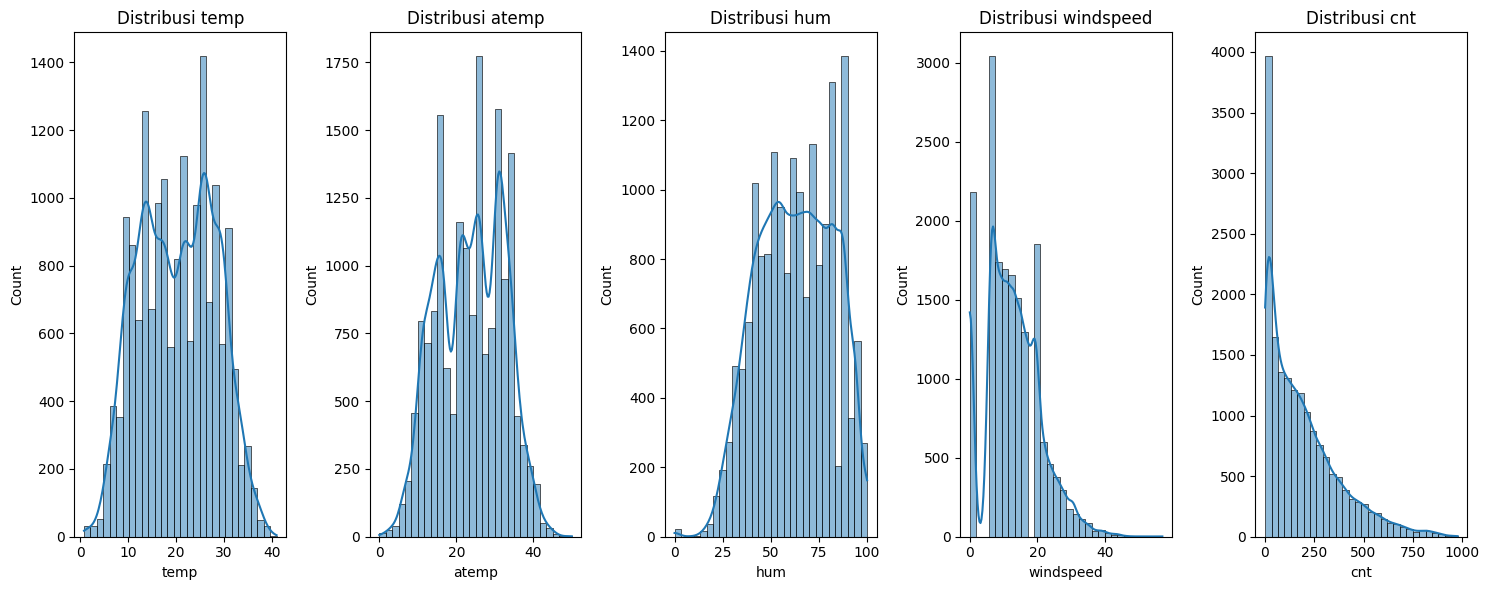

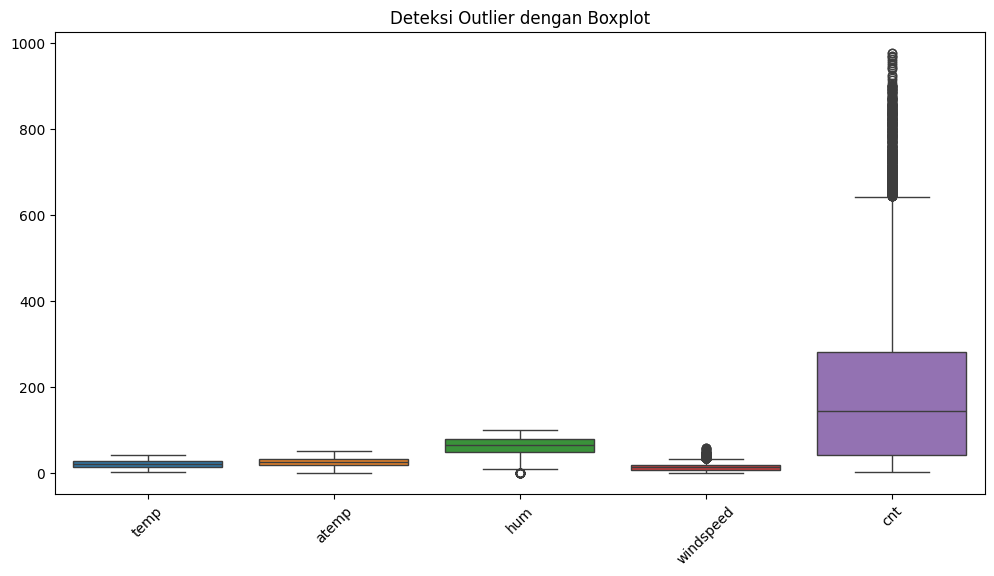

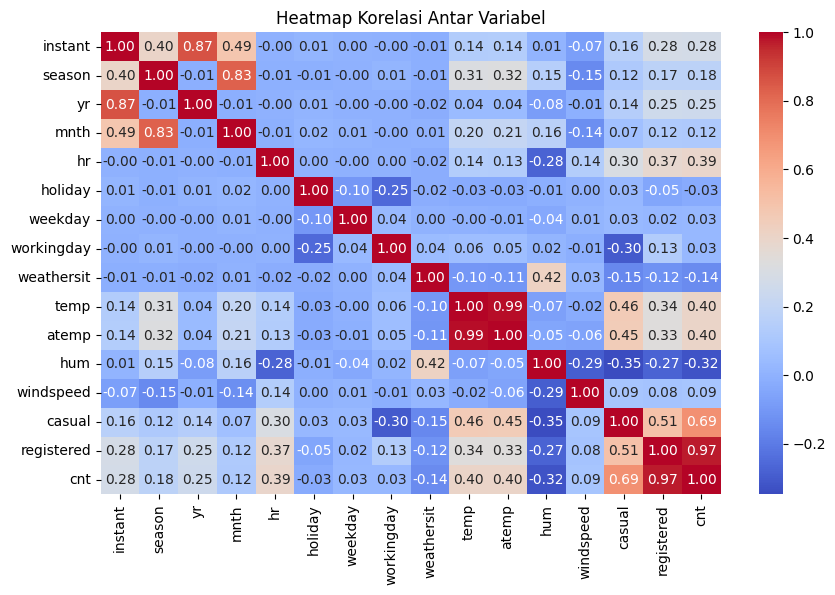

In [37]:
# Load dataset
df = pd.read_csv("all_data_cleaned.csv")

# Menampilkan statistik deskriptif untuk melihat distribusi data
print(df.describe())

# Visualisasi distribusi kolom yang ingin dieksplorasi
kolom_explore = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(15, 6))
for i, kolom in enumerate(kolom_explore, 1):
    plt.subplot(1, len(kolom_explore), i)
    sns.histplot(df[kolom], kde=True, bins=30)
    plt.title(f'Distribusi {kolom}')

plt.tight_layout()
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[kolom_explore])
plt.title("Deteksi Outlier dengan Boxplot")
plt.xticks(rotation=45)
plt.show()

# **Menghapus kolom non-numerik sebelum heatmap**
df_numeric = df.select_dtypes(include=['number'])

# Korelasi antar variabel
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

**Insight:**
- Suhu (temp) berpengaruh signifikan terhadap jumlah penyewaan sepeda (semakin panas, semakin banyak penyewaan).
- Kelembaban (hum) tinggi mengurangi penyewaan sepeda, sedangkan kecepatan angin (windspeed) tidak berpengaruh besar.
- Distribusi cnt skewed ke kanan, menunjukkan lebih banyak hari dengan penyewaan rendah.
- Ada beberapa outlier pada windspeed dan hum yang perlu dianalisis lebih lanjut.
- temp dan atemp sangat berkorelasi, bisa pilih salah satu untuk analisis lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola peminjaman sepeda berdasarkan waktu dalam sehari, dan apakah ada perbedaan pola antara hari kerja dan akhir pekan?



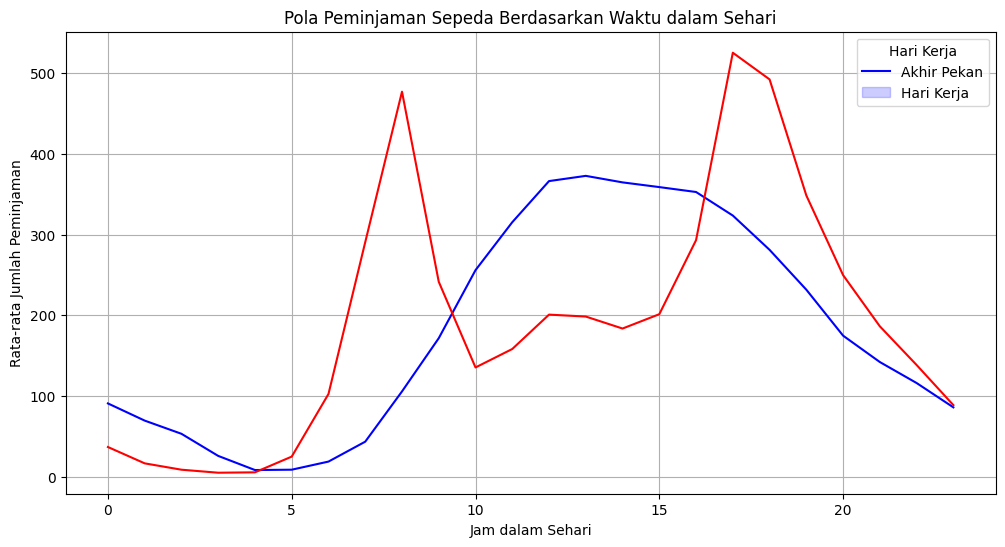

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan jam dan status hari kerja
hourly_rentals = all_data_cleaned.groupby(["hr", "workingday"])["cnt"].mean().reset_index()

# Plot visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x="hr", y="cnt", hue="workingday", palette=["blue", "red"])

# Menambahkan label dan judul
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Pola Peminjaman Sepeda Berdasarkan Waktu dalam Sehari")
plt.legend(title="Hari Kerja", labels=["Akhir Pekan", "Hari Kerja"])
plt.grid(True)
plt.show()

### Pertanyaan 2: **Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?**

<ipython-input-39-e89d8528411a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=weather_rentals, palette="coolwarm")


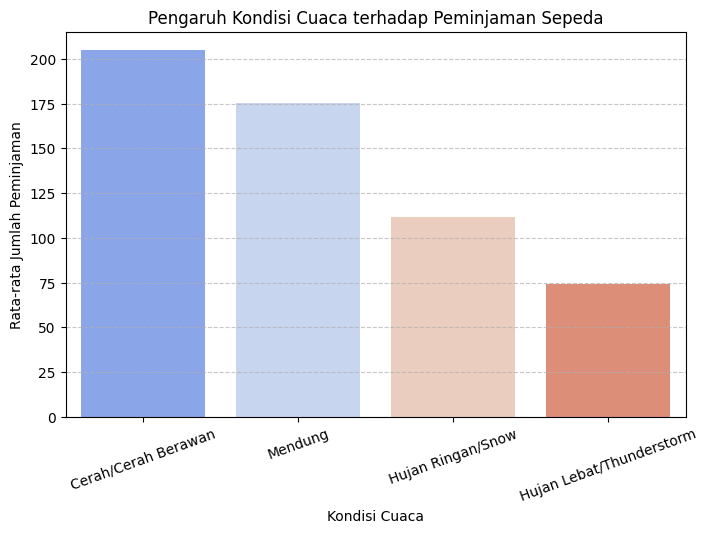

In [39]:
# Mengelompokkan data berdasarkan kondisi cuaca (weathersit) dan menghitung rata-rata jumlah peminjaman
weather_rentals = all_data_cleaned.groupby("weathersit")["cnt"].mean().reset_index()

# Mapping kondisi cuaca berdasarkan nilai yang ada di dataset
weather_conditions = {
    1: "Cerah/Cerah Berawan",
    2: "Mendung",
    3: "Hujan Ringan/Snow",
    4: "Hujan Lebat/Thunderstorm"
}

# Mengubah nilai numerik menjadi label kategori
weather_rentals["weathersit"] = weather_rentals["weathersit"].map(weather_conditions)

# Membuat visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", data=weather_rentals, palette="coolwarm")

# Menambahkan label dan judul
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


**Insight:**
- Peminjaman sepeda pada hari kerja memiliki dua puncak utama, yaitu pagi hari (sekitar pukul 7-9) dan sore hari (sekitar pukul 17-19). Ini menunjukkan bahwa sepeda sering digunakan untuk perjalanan kerja atau sekolah.
- Pada akhir pekan, pola peminjaman lebih merata sepanjang hari, dengan lonjakan tertinggi terjadi di tengah hari (sekitar pukul 10-16). Ini mengindikasikan bahwa orang lebih sering menggunakan sepeda untuk rekreasi atau aktivitas santai.

- Jumlah peminjaman sepeda paling tinggi terjadi saat cuaca cerah atau berawan, yang menunjukkan bahwa kondisi cuaca yang nyaman mendorong penggunaan sepeda.
- Saat cuaca mendung, peminjaman sedikit menurun tetapi masih cukup tinggi.
- Ketika terjadi hujan ringan atau salju, jumlah peminjaman turun secara signifikan, menandakan bahwa pengguna mulai menghindari sepeda dalam kondisi kurang nyaman.
- Hujan lebat atau badai petir menyebabkan peminjaman menurun drastis, yang masuk akal karena kondisi ini kurang ideal dan berisiko bagi pesepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- **Pertanyaan 1:** Pola peminjaman sepeda berbeda antara hari kerja dan akhir pekan. Pada hari kerja, peminjaman didominasi oleh jam sibuk pagi dan sore, sedangkan pada akhir pekan, peminjaman lebih merata sepanjang hari dengan puncak di siang hari.  
- **Pertanyaan 2:** Cuaca berpengaruh signifikan terhadap peminjaman sepeda. Semakin buruk kondisi cuaca (hujan atau badai), semakin sedikit jumlah peminjaman, sementara cuaca cerah mendorong lebih banyak pemakaian sepeda.